# **IMPORTING LIBRARY**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from IPython.display import clear_output
%matplotlib inline

# **IMPORTING DATASET**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/LGM RAW DATA/globalterrorismdb_0718dist.csv",encoding='ISO-8859-1')
df.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# **CHECKING DATA TYPES**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


# **CHECKING SHAPE**

In [ ]:
df.shape

(181691, 135)

# **EXTRACTING COLUMNS NAME**

In [ ]:
list1=[]
for i in df.columns:
  list1.append(i)
list1

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

# **ASSIGNING NEW VARIABLE FOR IMPORTANT COLUMNS**

In [ ]:
data=df[['eventid','iyear','country_txt','region_txt','provstate','city','crit1','crit2','crit3','success','suicide','attacktype1_txt','targtype1','natlty1_txt','gname','guncertain1','claimed','weaptype1_txt','nkill','nwound']]

In [ ]:
data.head(5)

,eventid,iyear,country_txt,region_txt,provstate,city,crit1,crit2,crit3,success,suicide,attacktype1_txt,targtype1,natlty1_txt,gname,guncertain1,claimed,weaptype1_txt,nkill,nwound
0,197000000001,1970,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,1,1,1,1,0,Assassination,14,Dominican Republic,MANO-D,0.0,NaN,Unknown,1.0,0.0
1,197000000002,1970,Mexico,North America,Federal,Mexico city,1,1,1,1,0,Hostage Taking (Kidnapping),7,Belgium,23rd of September Communist League,0.0,NaN,Unknown,0.0,0.0
2,197001000001,1970,Philippines,Southeast Asia,Tarlac,Unknown,1,1,1,1,0,Assassination,10,United States,Unknown,0.0,NaN,Unknown,1.0,0.0
3,197001000002,1970,Greece,Western Europe,Attica,Athens,1,1,1,1,0,Bombing/Explosion,7,United States,Unknown,0.0,NaN,Explosives,NaN,NaN
4,197001000003,1970,Japan,East Asia,Fukouka,Fukouka,1,1,1,1,0,Facility/Infrastructure Attack,7,United States,Unknown,0.0,NaN,Incendiary,NaN,NaN


# **WHICH COUNTRY HAS HIGHEST NUMBER OF TERRORIST ATTACK**

In [ ]:
print("Country Has The Highest Attack Is", data['country_txt'].value_counts().index[0])

Country Has The Highest Attack Is Iraq


# **WHICH REGION HAS HIGHEST NUMBER OF TERRORIST ATTACK**

In [ ]:
print("Region having Highest Number Of Terrorist Attack", data["region_txt"].value_counts().index[0])

Region having Highest Number Of Terrorist Attack Middle East & North Africa


# **MAXIMUN NUBER OF PEOPLE KILLED IN SINGLE TERRORIST ATTACK**

In [ ]:
print("Maximum Number of People Were Killed In Single Terrorist Attack ", data["nkill"].max())

Maximum Number of People Were Killed In Single Terrorist Attack  1570.0


# **CALCULATING TOTAL DAMAGE DUE TO TERRORIST ATTACK AND ASSIGNING TO NEW COLUMN**

In [ ]:
data["damage"]=data["nkill"]+data["nwound"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data.head(5)

,eventid,iyear,country_txt,region_txt,provstate,city,crit1,crit2,crit3,success,...,attacktype1_txt,targtype1,natlty1_txt,gname,guncertain1,claimed,weaptype1_txt,nkill,nwound,damage
0,197000000001,1970,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,1,1,1,1,...,Assassination,14,Dominican Republic,MANO-D,0.0,NaN,Unknown,1.0,0.0,1.0
1,197000000002,1970,Mexico,North America,Federal,Mexico city,1,1,1,1,...,Hostage Taking (Kidnapping),7,Belgium,23rd of September Communist League,0.0,NaN,Unknown,0.0,0.0,0.0
2,197001000001,1970,Philippines,Southeast Asia,Tarlac,Unknown,1,1,1,1,...,Assassination,10,United States,Unknown,0.0,NaN,Unknown,1.0,0.0,1.0
3,197001000002,1970,Greece,Western Europe,Attica,Athens,1,1,1,1,...,Bombing/Explosion,7,United States,Unknown,0.0,NaN,Explosives,NaN,NaN,NaN
4,197001000003,1970,Japan,East Asia,Fukouka,Fukouka,1,1,1,1,...,Facility/Infrastructure Attack,7,United States,Unknown,0.0,NaN,Incendiary,NaN,NaN,NaN


# **DATA CLEANING**

In [ ]:
data["attacktype1_txt"]=data["attacktype1_txt"].replace("Hostage Taking .*",'Hostage',regex=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data.head(5)

,eventid,iyear,country_txt,region_txt,provstate,city,crit1,crit2,crit3,success,...,attacktype1_txt,targtype1,natlty1_txt,gname,guncertain1,claimed,weaptype1_txt,nkill,nwound,damage
0,197000000001,1970,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,1,1,1,1,...,Assassination,14,Dominican Republic,MANO-D,0.0,NaN,Unknown,1.0,0.0,1.0
1,197000000002,1970,Mexico,North America,Federal,Mexico city,1,1,1,1,...,Hostage,7,Belgium,23rd of September Communist League,0.0,NaN,Unknown,0.0,0.0,0.0
2,197001000001,1970,Philippines,Southeast Asia,Tarlac,Unknown,1,1,1,1,...,Assassination,10,United States,Unknown,0.0,NaN,Unknown,1.0,0.0,1.0
3,197001000002,1970,Greece,Western Europe,Attica,Athens,1,1,1,1,...,Bombing/Explosion,7,United States,Unknown,0.0,NaN,Explosives,NaN,NaN,NaN
4,197001000003,1970,Japan,East Asia,Fukouka,Fukouka,1,1,1,1,...,Facility/Infrastructure Attack,7,United States,Unknown,0.0,NaN,Incendiary,NaN,NaN,NaN


# **DATA VISUALATION**

In [ ]:
attack_filtered=data["attacktype1_txt"].apply(lambda x:x if x in ["Bombing/Explosion","Armed Assault","Assassination","Hostage Taking","Facility/Infrastructure Attack"] else "Others")

In [ ]:
attack_type=attack_filtered.value_counts().tolist()
attack_type

[88255, 42669, 21099, 19312, 10356]

In [ ]:
labels=["Bombing/Explosion","Armed Assault","Assassination","Hostage Taking","Facility/Infrastructure Attack"]

In [ ]:
sizes=[]

In [ ]:
for i in attack_type:
  percent=(i*100)/len(data["attacktype1_txt"])
  sizes.append(percent)

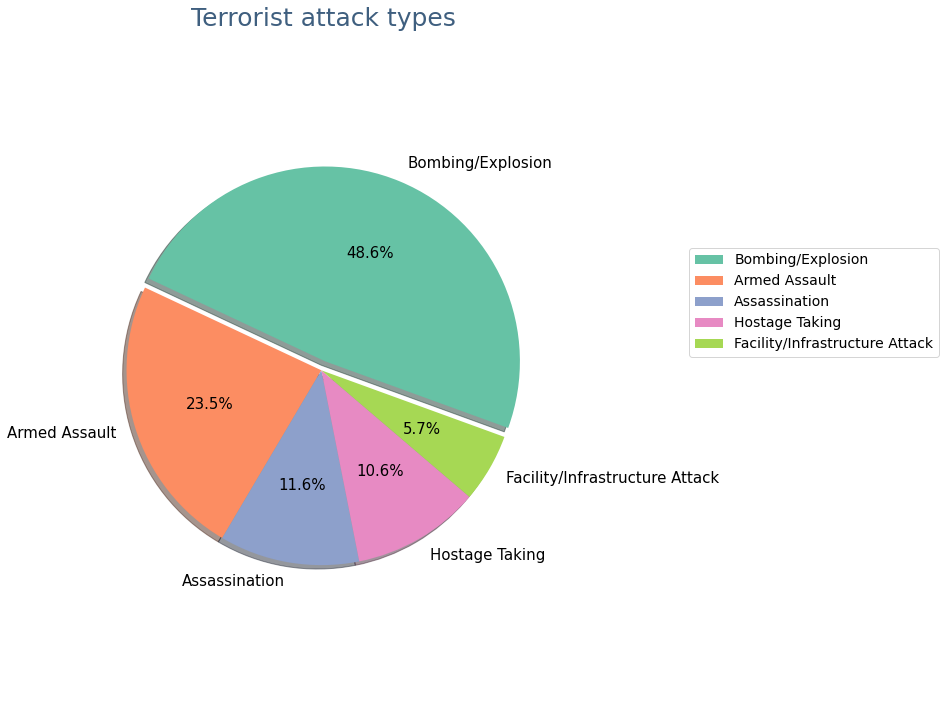

In [ ]:
fig,ax=plt.subplots(figsize=(10,10))
patches,texts,autotexts=ax.pie(sizes,labels=labels,autopct="%1.1f%%",startangle=-20,shadow=True,explode=(0.05,0,0,0,0,),
                               colors=sns.color_palette("Set2",8)[:5]+[(0.58,0.64,0.65)],
                               textprops={'fontsize':15,'weight':'light','color':'k'})
ax.axis("equal")
plt.title("Terrorist attack types",fontsize=25,pad=-70,color=sns.cubehelix_palette(8,start=.5,rot=-.75)[-3])
plt.tight_layout()
ax.legend(loc="lower right",bbox_to_anchor=(1.8,0.5,0.1,1),prop={"size":14})
fig.show()

In [ ]:
cat=["Bombing/Explosion","Armed Assault","Assassination","Hostage Taking","Facility/Infrastructure Attack"]
color_cat=sns.color_palette('Set2',8)[:5]
color_cat_dict=dict(zip(cat,color_cat))
tabel1=data[["attacktype1_txt","damage"]].groupby("attacktype1_txt",as_index=False).sum().sort_values(by="damage",ascending=False)
tabel1=tabel1.reset_index()

In [ ]:
inci=[8825,42669,7276,19312,12149,659,1015,10356]

In [ ]:
tabel1["Incidents"]=np.array(inci)

In [ ]:
tabel1["damage rate"]=tabel1["damage"]/tabel1["Incidents"]

In [ ]:
tabel1

,index,attacktype1_txt,damage,Incidents,damage rate
0,2,Bombing/Explosion,514233.0,8825,58.270028
1,0,Armed Assault,212386.0,42669,4.977525
2,7,Unknown,39606.0,7276,5.443375
3,1,Assassination,37209.0,19312,1.926729
4,5,Hostage,27732.0,12149,2.282657
5,4,Hijacking,20642.0,659,31.323217
6,6,Unarmed Assault,14791.0,1015,14.572414
7,3,Facility/Infrastructure Attack,6293.0,10356,0.607667


In [ ]:
labels=tabel1["attacktype1_txt"].tolist()
x=np.arange(len(labels))
dmg=tabel1["damage"].tolist()
dmg

[514233.0, 212386.0, 39606.0, 37209.0, 27732.0, 20642.0, 14791.0, 6293.0]

In [ ]:
gray=(0.5,0.64,0.65)
color_list=[color_cat_dict[ter_type]if ter_type in color_cat_dict.keys() else gray for ter_type in labels]

In [ ]:
color_list

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5, 0.64, 0.65),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.5, 0.64, 0.65),
 (0.5, 0.64, 0.65),
 (0.5, 0.64, 0.65),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235)]

In [ ]:
d_rate=tabel1["damage rate"].tolist()

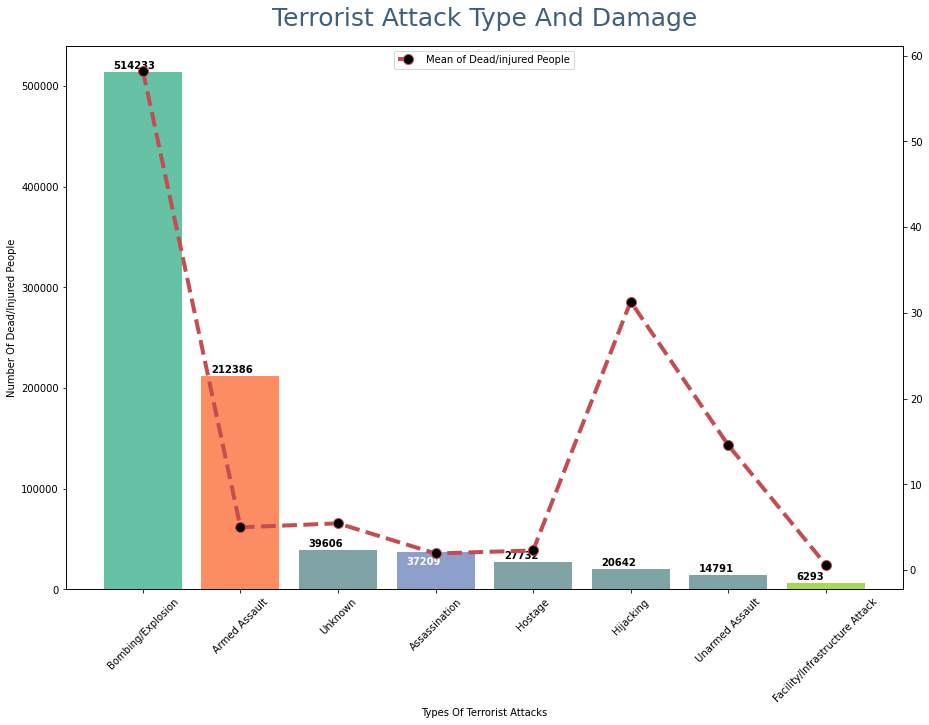

In [ ]:
fig,ax1=plt.subplots(figsize=(15,10))
ax1.bar(labels,dmg,color=color_list,align="center")
for i,v in enumerate(dmg):
  ax1.text(i-0.3,v-13000 if v==37209 else v+3000, str(round(v)),color='w' if v==37209 else 'k',fontweight='bold')
  
ax2=ax1.twinx()
ax2.plot(labels,d_rate,linestyle='--',linewidth=4,marker='o',markerfacecolor='black',markersize='10',label='Mean of Dead/injured People', color='#c44D51')
plt.title("Terrorist Attack Type And Damage", fontsize=25,pad=20,color=sns.cubehelix_palette(8,start=.5,rot=-.75)[-3])
ax1.set(xlabel="Types Of Terrorist Attacks",ylabel='Number Of Dead/Injured People')
ax1.set_xticklabels(labels,rotation=45)
plt.yticks(fontsize=10)
ax2.legend(loc="upper center")
fig.show()

In [ ]:
tabel2=data[["weaptype1_txt","damage"]].groupby("weaptype1_txt",as_index=False).sum().sort_values(by="damage",ascending=False)

In [ ]:
df_count=data['weaptype1_txt'].value_counts()
df_count=df_count.reindex(tabel2['weaptype1_txt'].values)

In [ ]:
df_count

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Melee                                                                           3655
Chemical                                                                         321
Incendiary                                                                     11135
Biological                                                                        35
Sabotage Equipment                                                               141
Other                                                                            114
Radiological                                                                      14
Fake Weapons                                                     

In [ ]:
tabel2['weapcount']=df_count.values

In [ ]:
tabel2

,weaptype1_txt,damage,weapcount
2,Explosives,537788.0,92426
4,Firearms,225473.0,58524
10,Unknown,50167.0,15157
11,Vehicle (not to include vehicle-borne explosiv...,20297.0,136
6,Melee,14489.0,3655
1,Chemical,14377.0,321
5,Incendiary,8898.0,11135
0,Biological,814.0,35
9,Sabotage Equipment,357.0,141
7,Other,225.0,114


In [ ]:
tabel2['weap_damage_rate']=tabel2['damage']/tabel2['weapcount']

In [ ]:
tabel2

,weaptype1_txt,damage,weapcount,weap_damage_rate
2,Explosives,537788.0,92426,5.818579
4,Firearms,225473.0,58524,3.852659
10,Unknown,50167.0,15157,3.309824
11,Vehicle (not to include vehicle-borne explosiv...,20297.0,136,149.242647
6,Melee,14489.0,3655,3.964159
1,Chemical,14377.0,321,44.788162
5,Incendiary,8898.0,11135,0.799102
0,Biological,814.0,35,23.257143
9,Sabotage Equipment,357.0,141,2.531915
7,Other,225.0,114,1.973684


In [ ]:
weaplabels=tabel2['weaptype1_txt'].tolist()
weaplabels

['Explosives',
 'Firearms',
 'Unknown',
 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
 'Melee',
 'Chemical',
 'Incendiary',
 'Biological',
 'Sabotage Equipment',
 'Other',
 'Radiological',
 'Fake Weapons']

In [ ]:
y=np.arange(len(weaplabels))

In [ ]:
weapdmg=tabel2['damage'].tolist()
weapdmg

[537788.0,
 225473.0,
 50167.0,
 20297.0,
 14489.0,
 14377.0,
 8898.0,
 814.0,
 357.0,
 225.0,
 6.0,
 1.0]

In [ ]:
wgray=(0.5,0.64,0.65)

In [ ]:
w_cat=["Explosives","Firearms","Unknown","Incendiary"]

In [ ]:
wcolorcat=sns.color_palette('Set2',8)[:4:1]

In [ ]:
wcolor_cat_dict=dict(zip(w_cat,wcolorcat))

In [ ]:
wcolor_list=[wcolor_cat_dict[ter_type]if ter_type in wcolor_cat_dict.keys() else wgray for ter_type in weaplabels]

In [ ]:
w_rate=tabel2['weap_damage_rate'].tolist()

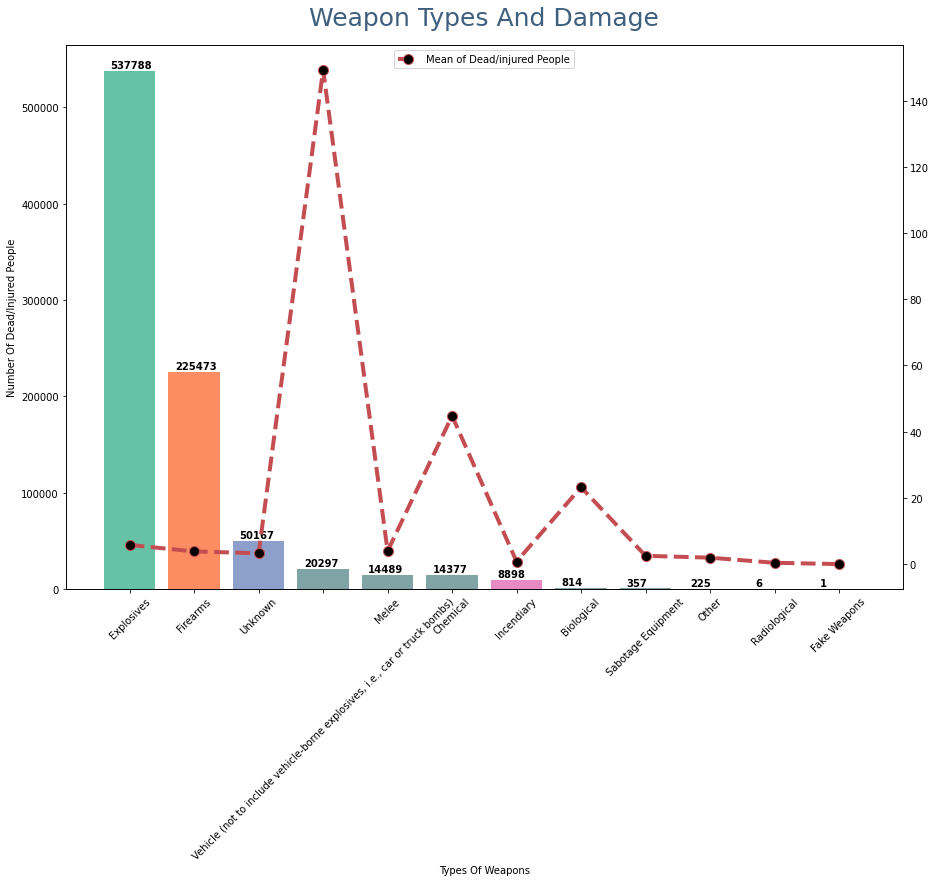

In [ ]:
fig,ax1=plt.subplots(figsize=(15,10))
ax1.bar(weaplabels,weapdmg,color=wcolor_list,align="center")
for i,v in enumerate(weapdmg):
  ax1.text(i-0.3,v-13000 if v==37209 else v+3000, str(round(v)),color='w' if v==37209 else 'k',fontweight='bold')
  
ax2=ax1.twinx()
ax2.plot(weaplabels,w_rate,linestyle='--',linewidth=4,marker='o',markerfacecolor='black',markersize='10',label='Mean of Dead/injured People',color='#c44D51')
plt.title("Weapon Types And Damage", fontsize=25,pad=20,color=sns.cubehelix_palette(8,start=.5,rot=-.75)[-3])
ax1.set(xlabel="Types Of Weapons",ylabel='Number Of Dead/Injured People')
ax1.set_xticklabels(weaplabels,rotation=45)
plt.yticks(fontsize=10)
ax2.legend(loc="upper center")
fig.show()

In [ ]:
country_damage=data[data['iyear']>1999][["country_txt",'damage']].groupby("country_txt",as_index=False).sum()
country_damage

,country_txt,damage
0,Afghanistan,78988.0
1,Albania,3.0
2,Algeria,6724.0
3,Angola,1773.0
4,Argentina,5.0
...,...,...
162,Western Sahara,3.0
163,Yemen,16122.0
164,Yugoslavia,30.0
165,Zambia,2.0


In [ ]:
data_paint=country_damage.sort_values(by='damage',ascending=False).head(10)
data_paint

,country_txt,damage
69,Iraq,201126.0
0,Afghanistan,78988.0
110,Pakistan,54873.0
65,India,27251.0
156,United States,21520.0
108,Nigeria,20874.0
142,Syria,20754.0
163,Yemen,16122.0
131,Somalia,15930.0
115,Philippines,11896.0


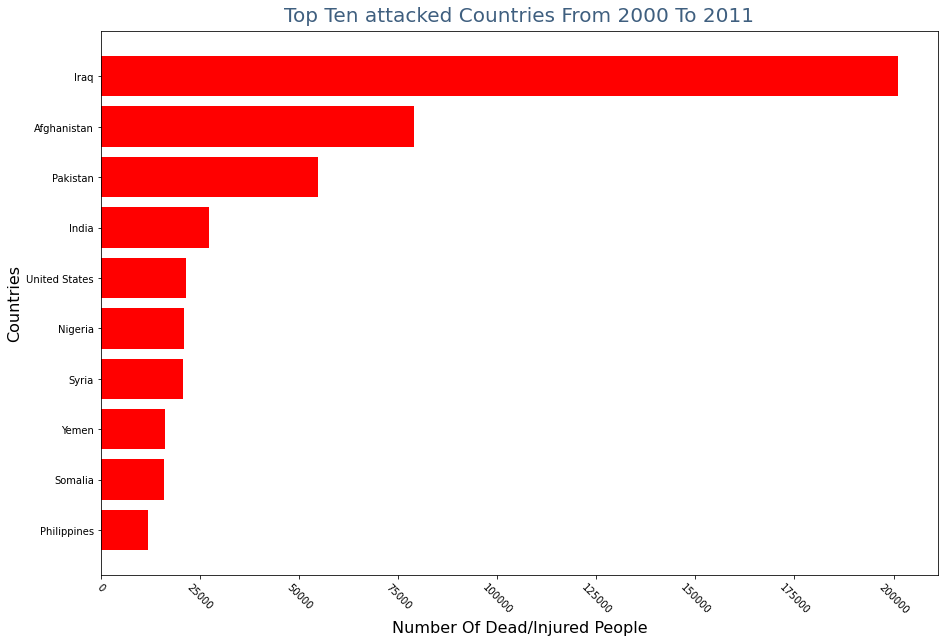

In [ ]:
fig,ax=plt.subplots(figsize=(15,10))
ax.barh(data_paint['country_txt'][::-1],data_paint["damage"][::-1],color='red')
plt.xticks(rotation=-45)
ax.set_ylabel("Countries",size=16)
ax.set_xlabel("Number Of Dead/Injured People",size=16)
plt.title("Top Ten attacked Countries From 2000 To 2011",fontsize=20,pad=10,color=sns.cubehelix_palette(8,start=.5,rot=-.75)[-3])
plt.show()

In [ ]:
nalty_dmg=data[data['iyear']>1999][["natlty1_txt",'damage']].groupby("natlty1_txt",as_index=False).sum()


In [ ]:
data_paint_natly=nalty_dmg.sort_values(by='damage',ascending=False).head(10)
data_paint_natly

,natlty1_txt,damage
74,Iraq,196387.0
0,Afghanistan,71886.0
123,Pakistan,53901.0
70,India,27296.0
174,United States,25035.0
118,Nigeria,20643.0
159,Syria,20342.0
182,Yemen,15622.0
147,Somalia,13516.0
128,Philippines,11702.0


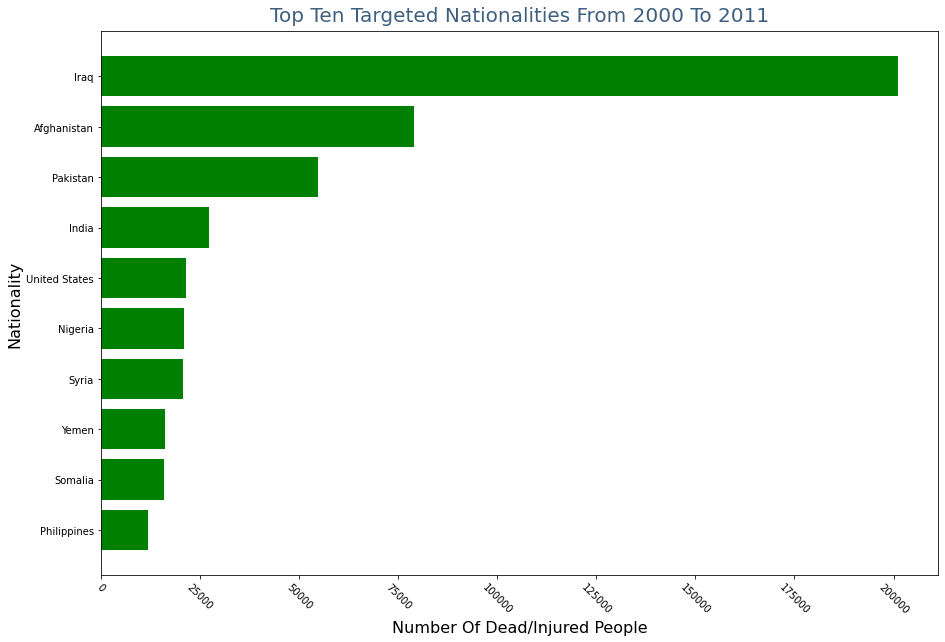

In [ ]:
fig,ax=plt.subplots(figsize=(15,10))
ax.barh(data_paint_natly['natlty1_txt'][::-1],data_paint["damage"][::-1],color='green')
plt.xticks(rotation=-45)
ax.set_ylabel("Nationality",size=16)
ax.set_xlabel("Number Of Dead/Injured People",size=16)
plt.title("Top Ten Targeted Nationalities From 2000 To 2011",fontsize=20,pad=10,color=sns.cubehelix_palette(8,start=.5,rot=-.75)[-3])
plt.show()

In [ ]:
country_damage[country_damage["damage"]==0]

,country_txt,damage
9,Bahamas,0.0
14,Belize,0.0
34,Cyprus,0.0
64,Iceland,0.0
105,New Zealand,0.0
117,Portugal,0.0
129,Slovenia,0.0
139,Swaziland,0.0
147,Togo,0.0
160,Vietnam,0.0


In [ ]:
def country_nationality(n):
  top10_bad=data[data["iyear"]==n][["country_txt",'damage']].groupby("country_txt",as_index=False).sum()
  data_paint=top10_bad.sort_values(by='damage',ascending=False).head(10)
  fig,ax=plt.subplots(1,2,figsize=(16,4))
  ax[0].barh(data_paint["country_txt"][::-1],data_paint["damage"][::-1],color=["red",'green','#344650','#df2029','#FFFC00','#E4405F','#3B5999','#00c300','#ff0084'])
  ax[0].set_ylabel("Countries",size=16)
  ax[0].set_xlabel("Number Of Dead/Injuried People",size=16)
  ax[0].set_title("Top Ten Attacked Countries %d" %n,fontsize=15,pad=10,color=sns.cubehelix_palette(8,start=.5,rot=-.75)[-3])
  plt.subplots_adjust(wspace=0.3)
  nalty_dmg=data[data['iyear']>1999][["natlty1_txt",'damage']].groupby("natlty1_txt",as_index=False).sum()
  data_paint_natly=nalty_dmg.sort_values(by='damage',ascending=False).head(10)
  ax[1].barh(data_paint_natly['natlty1_txt'][::-1],data_paint["damage"][::-1],color='green')
  ax[1].set_ylabel("Nationality",size=16)
  ax[1].set_xlabel("Number Of Dead/Injured People",size=16)
  ax[1].set_title("Top Ten Targeted Nationalities From 2000 To 2011",fontsize=20,pad=10,color=sns.cubehelix_palette(8,start=.5,rot=-.75)[-3])
  plt.show()
  for ax in fig.axes:
    plt.sca(ax)
  plt.show()

In [ ]:
list_year=[]
for year in range(1970,1993): list_year.append(year)

In [ ]:
for year in range(1994,2018): list_year.append(year)

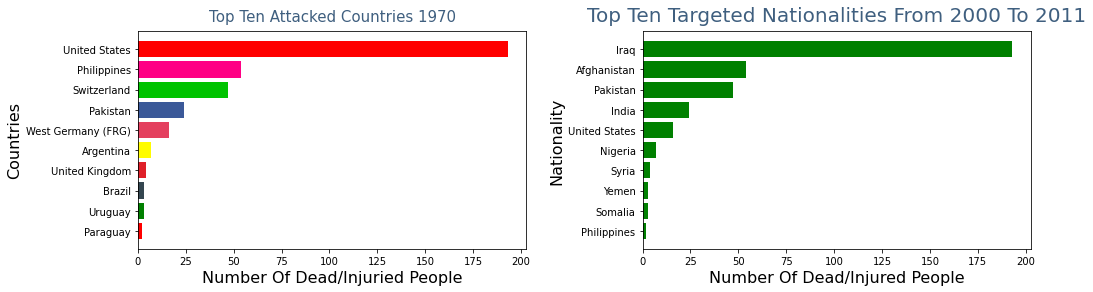

ValueError: ignored

In [ ]:
for year in list_year:
  country_nationality(year)
  time.sleep(2)
  clear_output()

In [ ]:
def country_nationality_year():
  try:
      year=int(input("Please Enter Any year Want To See Chart from 1970-2017"))
      if year ==1993:
        print("Sorry, No Terrorism Data In year 1993")
      while year not in list_year:
        print("Please Input The Year From 1970 To 2017")
        year=int("Please Enter Any year Want To See Chart from 1970-2017")
  except (ValueError, ZeroDivisionError) as ex:
      print("Wrong Type, Input Again: ")
      country_nationality_year()
  else:
      country_nationality(year)

Please Enter Any year Want To See Chart from 1970-20172000


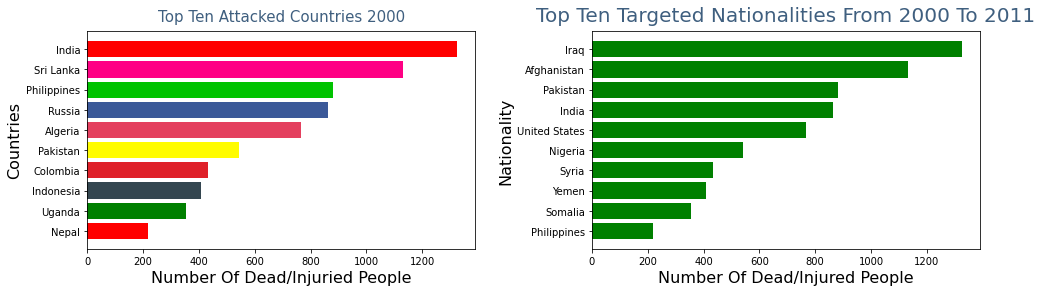

ValueError: ignored

In [ ]:
country_nationality_year()